# Program to extract length of roads

We can extract length of roads from Shapefile or GeoJSON by using **Pandas** and **GeoPandas** modules. <br/>
You can download country specific OpenStreetMap data from [GeoFabrik](https://download.geofabrik.de/). The common data formats available are PBF and Shapefiles. 

By conventions, we import `geopandas` as `gpd` and `pandas` as `pd`

In [8]:
import geopandas as gpd
import pandas as pd
import os

### Reading Spatial Data

In [31]:
data_directory = 'Data'
filename1 = 'osm_roads.shp'
filename2 = 'states-boundary.shp'

path1 = os.path.join(data_directory, filename1)
path2 = os.path.join(data_directory, filename2)

GeoPandas provide `read_file()` method that can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files. <br/> 
Here we will read `osm_roads.shp` & `states-boundary.shp` files. The results are stored in GeoDataFrames.

In [33]:
roads_gdf = gpd.read_file(path1)
state_boundary_gdf = gpd.read_file(path2)

Print GeoDataFrame information to check all columns

In [34]:
print(roads_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4543716 entries, 0 to 4543715
Data columns (total 11 columns):
 #   Column    Dtype   
---  ------    -----   
 0   osm_id    object  
 1   code      int64   
 2   fclass    object  
 3   name      object  
 4   ref       object  
 5   oneway    object  
 6   maxspeed  int64   
 7   layer     int64   
 8   bridge    object  
 9   tunnel    object  
 10  geometry  geometry
dtypes: geometry(1), int64(3), object(7)
memory usage: 381.3+ MB
None


In [35]:
print(state_boundary_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ST_NM     36 non-null     object  
 1   geometry  36 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 704.0+ bytes
None


Concatenate both road network and states boundary GeoDataFrames using Pandas & `concat()` method

In [36]:
gdf = gpd.GeoDataFrame(pd.concat([roads_gdf, state_boundary_gdf]))

Print first 5 rows of concatenated GeoDataFrame

In [37]:
gdf.head(n=5)

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,ST_NM
0,3191425,5122.0,residential,U2,None,B,0.0,0.0,F,F,"LINESTRING (76.33477 10.30729, 76.33477 10.306...",NaN
1,3191437,5122.0,residential,Housing Board,None,B,0.0,0.0,F,F,"LINESTRING (76.33260 10.29993, 76.33327 10.299...",NaN
2,3194810,5122.0,residential,Market Road,None,B,0.0,0.0,F,F,"LINESTRING (76.33898 10.30246, 76.33894 10.302...",NaN
3,3195126,5114.0,secondary,Police Station Road,MDR,B,0.0,0.0,F,F,"LINESTRING (76.33727 10.30187, 76.33901 10.30173)",NaN
4,3195159,5122.0,residential,Nirmala College Road,None,B,0.0,0.0,F,F,"LINESTRING (76.33361 10.29990, 76.33393 10.299...",NaN


Print last 5 rows of concatenated GeoDataFrame

In [38]:
gdf.tail(n=5)

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,ST_NM
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((79.36626 25.17159, 79.36538 25...",Uttar Pradesh
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((88.05099 21.50899, 88.04896 21...",West Bengal
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((80.77754 15.86372, 80.77785 15...",Andhra Pradesh
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((79.80953 10.87805, 79.80729 10...",Puducherry
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((74.38930 22.03234, 74.38946 22...",Maharashtra


A GeoDataFrame contains a special column called `geometry` <br/> 
All spatial operations on the GeoDataFrame are applied to the geometry column. It can be accessed using the `geometry` attribute.

In [39]:
print(roads_gdf.geometry)

0          LINESTRING (76.33477 10.30729, 76.33477 10.306...
1          LINESTRING (76.33260 10.29993, 76.33327 10.299...
2          LINESTRING (76.33898 10.30246, 76.33894 10.302...
3          LINESTRING (76.33727 10.30187, 76.33901 10.30173)
4          LINESTRING (76.33361 10.29990, 76.33393 10.299...
                                 ...                        
4543711    LINESTRING (82.92070 25.64035, 82.92187 25.646...
4543712    LINESTRING (82.97270 25.10599, 82.97281 25.10594)
4543713    LINESTRING (82.96831 25.10739, 82.96876 25.107...
4543714    LINESTRING (78.15619 27.86951, 78.15592 27.86942)
4543715    LINESTRING (78.16072 27.87011, 78.16012 27.870...
Name: geometry, Length: 4543716, dtype: geometry


### Filtering Data

Filter using based on coordinate based indexing with the `cx` [indexer](https://geopandas.readthedocs.io/en/latest/docs/user_guide/indexing.html).<br/>
Let's filter only [National Highways](https://wiki.openstreetmap.org/wiki/India/Tags/Highway) (NH) in India with `ref` and `NH` key and value pair. 

In [40]:
filtered_gdf = roads_gdf[roads_gdf['ref'].str.match('^NH') == True]

In [41]:
print(filtered_gdf.head())

Plot filtered roads on map using `plot()` method

     osm_id  code   fclass                    name         ref oneway  \
19  4717427  5113  primary         Muthuswamy Road         NH4      F   
37  4731769  5112    trunk                    None  NH183;NH85      F   
38  4731770  5112    trunk    National Highway 183       NH183      B   
39  4747828  5112    trunk  Kollam - Theni Highway       NH183      B   
69  7988738  5112    trunk                    None         NH5      B   

    maxspeed  layer bridge tunnel  \
19         0      0      F      F   
37        50      0      F      F   
38        70      0      F      F   
39        70      0      F      F   
69        40      0      F      F   

                                             geometry  
19  LINESTRING (80.28444 13.08528, 80.28396 13.085...  
37  LINESTRING (77.47408 10.00829, 77.47377 10.008...  
38  LINESTRING (77.37157 9.83081, 77.37060 9.83026...  
39  LINESTRING (76.96089 9.55778, 76.96093 9.55773...  
69  LINESTRING (75.80573 30.89295, 75.80595 30.892...  


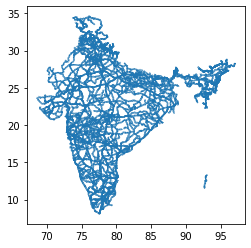

In [41]:
filtered_gdf.plot()

### Set Projections

Each GeoDataFrame as a `crs` attribute that contains the projection information. Our datasets are in `EPSG:4326 WGS84 CRS`

In [42]:
print(filtered_gdf.crs)

epsg:4326


In [43]:
roads_reprojected = filtered_gdf.to_crs('EPSG:32643')
print(roads_reprojected.crs)

EPSG:32643


We can calculate the length of each geometry using the `length` attribute and the result would be in meters. <br/>
We can add the `line length` in a new column named length.

In [44]:
roads_reprojected['length'] = roads_reprojected['geometry'].length

Let's sum all roads length using `sum()` method and divide it by 1000

In [45]:
total_length = roads_reprojected['length'].sum()

In [46]:
print('The total length of National Highways in India is {}'.format(total_length/1000))

The total length of National Highways in India is 154384.56601106178


### Spatial Joins

For our task, we need to pull length of NH's in specific states. This can be achieved using another spatial layer `states-boundary.shp` and perform `spatial join` using `sjoin()` method.

In [47]:
states_reprojected = state_boundary_gdf.to_crs('EPSG:32643')

In [48]:
joined_gdf = gpd.sjoin(roads_reprojected, states_reprojected, how='left', op='intersects')


In [49]:
print(joined_gdf.head())

     osm_id  code   fclass                    name         ref oneway  \
19  4717427  5113  primary         Muthuswamy Road         NH4      F   
37  4731769  5112    trunk                    None  NH183;NH85      F   
38  4731770  5112    trunk    National Highway 183       NH183      B   
39  4747828  5112    trunk  Kollam - Theni Highway       NH183      B   
69  7988738  5112    trunk                    None         NH5      B   

    maxspeed  layer bridge tunnel  \
19         0      0      F      F   
37        50      0      F      F   
38        70      0      F      F   
39        70      0      F      F   
69        40      0      F      F   

                                             geometry       length  \
19  LINESTRING (1073590.159 1452568.019, 1073538.8...   455.833138   
37  LINESTRING (771221.392 1107346.996, 771187.465...  2504.472430   
38  LINESTRING (760117.534 1087625.699, 760011.621...  3258.113132   
39  LINESTRING (715228.481 1057131.626, 715232.925...  157

## State-wise stats

The resulting GeoDataFrame now has the matching column from the intersecting state feature. <br/>
We can now sum the length of the NH's and group them by states. This type of group statistics is performed using Panda's `group_by()` method.

In [51]:
statewise_length = joined_gdf.groupby('ST_NM')['length'].sum()/1000

In [87]:
print(statewise_length)

ST_NM
Andaman & Nicobar                             332.134508
Andhra Pradesh                               8571.794672
Arunachal Pradesh                            2714.181621
Assam                                        4733.895787
Bihar                                        6163.976231
Chandigarh                                     33.825492
Chhattisgarh                                 3702.100326
Dadra and Nagar Haveli and Daman and Diu       66.573990
Delhi                                         219.679629
Goa                                           336.365653
Gujarat                                      8919.286697
Haryana                                      3861.955285
Himachal Pradesh                             2600.270246
Jammu & Kashmir                              1778.530735
Jharkhand                                    3719.129908
Karnataka                                    9277.865407
Kerala                                       2029.993093
Ladakh                   

## Output

The result of the `group_by()` method is a Pandas series. It can be saved to a CSV file using the `to_csv()` method.

In [94]:
output_filename = 'NH-length-India.csv'
output_dir = 'Data/output'

output_path = os.path.join(output_dir, output_filename)
statewise_length.to_csv(output_path)